# Mini Project 3: COVID-19 Data Analysis and Machine Learning

#### Created by Group 7 - Kamilla, Jeanette, Juvena

## Objective

This assignment aims to develop practical skills in data analysis, visualization, and machine learning using real-world COVID-19 data. The project focuses on exploring global pandemic-related indicators to uncover trends, build predictive models, and apply both supervised and unsupervised learning techniques using Python.

Before we begin analyzing the COVID-19 dataset, we need to import a few essential Python libraries that will help us manipulate the data, build models, and visualize our findings:

- **Pandas**: This is a powerful library used to handle and manipulate data in tables (called DataFrames).
- **NumPy**: It helps with numerical operations, especially when we work with arrays or need to do math.
- **Matplotlib** and **Seaborn**: These are popular libraries for creating visual charts and graphs. We'll use them to help us understand the data better by seeing it.
- **SciPy (stats module)**: This gives us access to statistical tools like checking if data is normally distributed.

We'll also configure default styles for our plots to ensure they're clean, visually appealing, and easy to interpret.

In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Set plot styles for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")


--------

# 1. Data wrangling and exploration

### Load the Data

Now that we have our tools ready, the next step is to load the COVID-19 dataset into Python so we can start analyzing it.

In this case, we’re working with a single dataset:

- **OWID COVID-19 Latest Data**: a CSV file that contains country-level information on cases, deaths, vaccinations, testing, and various socioeconomic indicators.

We'll use Pandas to read the CSV file and store it as a DataFrame. To make our code cleaner and reusable, we'll define a simple function that loads the data and performs some initial checks. This way, we can easily reload or replace the dataset if needed in future steps.

In [13]:
# File paths for the covid datasets. (dataset: last updated 2024-08-04)
dataset_covid = 'Dataset/owid-covid-latest.csv'

# Function to load the Excel files
def load_csv_to_dataframe(file_path):
    # Reads the Excel file and skips the first row if it contains a description or title
    df = pd.read_csv(file_path)
    return df

# Load datasets
print("..Loading COVID-19 dataset")
df_covid = load_csv_to_dataframe(dataset_covid)

..Loading COVID-19 dataset


### Explore the Data

After loading the dataset, we want to explore it to understand what kind of information it contains and how it's structured.

To do this, we can use several helpful Pandas functions such as `shape`, `types`, `info()`, `head()`, `tail()`, `sample()`, `describe()` and `isnull().sum()`. These functions will give us insights into the number of rows and columns, the data types of each column, a summary of the data, and any missing values. 

This exploration is crucial as it helps us identify potential issues or areas that need further cleaning or transformation before we proceed with our analysis. 

In [18]:
# Check the shape of the DataFrame (rows, columns)
df_covid.shape

(247, 67)

In [20]:
# Display the types of attributes (colum names) in the DataFrame
df_covid.dtypes

iso_code                                    object
continent                                   object
location                                    object
last_updated_date                           object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [22]:
# Gives an overview of the DataFrame
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    247 non-null    object 
 1   continent                                   235 non-null    object 
 2   location                                    247 non-null    object 
 3   last_updated_date                           247 non-null    object 
 4   total_cases                                 246 non-null    float64
 5   new_cases                                   242 non-null    float64
 6   new_cases_smoothed                          242 non-null    float64
 7   total_deaths                                246 non-null    float64
 8   new_deaths                                  243 non-null    float64
 9   new_deaths_smoothed                         243 non-null    float64
 10  total_cases_pe

In [24]:
# Display the first 5 rows of the DataFrame
df_covid.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2024-08-04,235214.0000,0.0000,0.0000,7998.0000,0.0000,0.0000,...,NaN,37.7460,0.5000,64.8300,0.5110,41128772.0000,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2024-08-04,13145380.0000,36.0000,5.1430,259117.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,1426736614.0000,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2024-08-04,335047.0000,0.0000,0.0000,3605.0000,0.0000,0.0000,...,51.2000,NaN,2.8900,78.5700,0.7950,2842318.0000,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2024-08-04,272139.0000,18.0000,2.5710,6881.0000,0.0000,0.0000,...,30.4000,83.7410,1.9000,76.8800,0.7480,44903228.0000,NaN,NaN,NaN,NaN
4,ASM,Oceania,American Samoa,2024-08-04,8359.0000,0.0000,0.0000,34.0000,0.0000,0.0000,...,NaN,NaN,NaN,73.7400,NaN,44295.0000,NaN,NaN,NaN,NaN


In [26]:
# Display the last 5 rows of the DataFrame
df_covid.tail()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
242,WLF,Oceania,Wallis and Futuna,2024-08-04,3760.0000,0.0000,0.0000,9.0000,0.0000,0.0000,...,NaN,NaN,NaN,79.9400,NaN,11596.0000,NaN,NaN,NaN,NaN
243,OWID_WRL,NaN,World,2024-08-14,775866783.0000,47169.0000,6738.4290,7057132.0000,815.0000,116.4290,...,34.6350,60.1300,2.7050,72.5800,0.7370,7975105024.0000,NaN,NaN,NaN,NaN
244,YEM,Asia,Yemen,2024-08-04,11945.0000,0.0000,0.0000,2159.0000,0.0000,0.0000,...,29.2000,49.5420,0.7000,66.1200,0.4700,33696612.0000,NaN,NaN,NaN,NaN
245,ZMB,Africa,Zambia,2024-08-04,349842.0000,18.0000,2.5710,4077.0000,0.0000,0.0000,...,24.7000,13.9380,2.0000,63.8900,0.5840,20017670.0000,NaN,NaN,NaN,NaN
246,ZWE,Africa,Zimbabwe,2024-08-04,266386.0000,0.0000,0.0000,5740.0000,0.0000,0.0000,...,30.7000,36.7910,1.7000,61.4900,0.5710,16320539.0000,NaN,NaN,NaN,NaN


In [28]:
# Display a random sample of 5 rows from the DataFrame
df_covid.sample(5)

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
179,PRI,North America,Puerto Rico,2024-08-04,1252713.0000,0.0000,0.0000,5938.0000,0.0000,0.0000,...,NaN,NaN,NaN,80.1000,NaN,3252412.0000,NaN,NaN,NaN,NaN
147,MSR,North America,Montserrat,2024-08-04,1403.0000,0.0000,0.0000,8.0000,0.0000,0.0000,...,NaN,NaN,NaN,74.1600,NaN,4413.0000,NaN,NaN,NaN,NaN
76,FRA,Europe,France,2024-08-04,38997490.0000,NaN,NaN,168091.0000,NaN,NaN,...,35.6000,NaN,5.9800,82.6600,0.9010,67813000.0000,NaN,NaN,NaN,NaN
79,GAB,Africa,Gabon,2024-08-04,49051.0000,0.0000,0.0000,307.0000,0.0000,0.0000,...,NaN,NaN,6.3000,66.4700,0.7030,2388997.0000,NaN,NaN,NaN,NaN
161,OWID_NAM,NaN,North America,2024-08-04,124492666.0000,454.0000,64.8570,1671178.0000,619.0000,88.4290,...,NaN,NaN,NaN,NaN,NaN,600323657.0000,NaN,NaN,NaN,NaN


In [30]:
# Gives summary statistics for all numerical columns in the dataset
df_covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,246.0000,242.0000,242.0000,246.0000,243.0000,243.0000,246.0000,242.0000,242.0000,246.0000,...,145.0000,96.0000,173.0000,231.0000,190.0000,247.0000,0.0000,0.0000,0.0000,0.0000
mean,13366338.3618,885.6074,126.5154,119868.9024,14.0329,2.0047,203988.2558,22.2049,3.1721,1271.4277,...,32.9099,50.7888,3.0970,73.6609,0.7225,130765647.1093,NaN,NaN,NaN,NaN
std,65681300.6852,4854.7862,693.5409,574723.9549,92.1793,13.1685,200456.9021,82.9626,11.8518,1322.6975,...,13.6218,32.1248,2.5558,7.4057,0.1494,668433300.4550,NaN,NaN,NaN,NaN
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,7.7000,1.1880,0.1000,53.2800,0.3940,47.0000,NaN,NaN,NaN,NaN
25%,27509.5000,0.0000,0.0000,183.7500,0.0000,0.0000,21257.7665,0.0000,0.0000,144.8082,...,22.6000,20.4820,1.3000,69.5450,0.6030,429495.5000,NaN,NaN,NaN,NaN
50%,232098.5000,0.0000,0.0000,2205.5000,0.0000,0.0000,135384.8950,0.0000,0.0000,877.6890,...,33.1000,49.6905,2.5000,75.0500,0.7400,5970430.0000,NaN,NaN,NaN,NaN
75%,1703973.7500,5.5000,0.7855,19388.5000,0.0000,0.0000,340625.3000,0.2320,0.0333,2032.2220,...,41.3000,82.6867,4.2000,79.2850,0.8287,28956709.0000,NaN,NaN,NaN,NaN
max,775866783.0000,47169.0000,6738.4290,7057132.0000,815.0000,116.4290,763598.6000,672.4370,96.0620,6601.1100,...,78.1000,100.0000,13.8000,86.7500,0.9570,7975105024.0000,NaN,NaN,NaN,NaN


##### Summary of exploring the data

After exploring the dataframe, we found that it contains a large number of columns, many of which are not useful for our analysis or modeling goals. While some columns provide valuable information (like total cases, deaths, and vaccination rates), others are either redundant, mostly empty, or irrelevant.

This highlights the need for a thorough data cleaning step to remove unnecessary columns, handle missing values, and focus only on the most relevant features for our machine learning tasks.

### Clean the Data

After loading and exploring the data, we need to clean it to ensure that our analysis is accurate and meaningful. Data cleaning involves several steps, including: checking for missing values, removing duplicates, and converting data types.

In [36]:
# Check for missing values in the DataFrame
df_covid.isnull().sum()

iso_code                                     0
continent                                   12
location                                     0
last_updated_date                            0
total_cases                                  1
                                          ... 
population                                   0
excess_mortality_cumulative_absolute       247
excess_mortality_cumulative                247
excess_mortality                           247
excess_mortality_cumulative_per_million    247
Length: 67, dtype: int64

The output above shows that many columns contain no values at all, so we will remove them to clean up the dataset.

In [39]:
# Before cleaning the data, we want to remove irrelevant OWID aggregate rows—such as those representing high-income, low-income, and other income groupings.
rows_to_remove = ["OWID_UMC", "OWID_WRL", "OWID_LMC", "OWID_LIC", "OWID_HIC"]
df_removed_rows = df_covid[~df_covid["iso_code"].isin(rows_to_remove)]

We are removing the 'low-income countries', 'lower-middle-income countries', 'upper-middle-income countries', 'high-income countries' and 'world' categories because they are too broad and lack specific country-level detail, making it difficult to draw meaningful conclusions without relying on assumptions.

In [42]:
# Checking if the above rows were removed
print(f"{df_covid.shape}")
print(f"Removed the {df_covid.shape[0] - df_removed_rows.shape[0]} OWID rows from the dataframe.")

(247, 67)
Removed the 5 OWID rows from the dataframe.


In [44]:
# We will drop all columns with no values at all like; excess_mortality_cumulative_absolute, excess_mortality_cumulative etc.
df_covid_removed_columns = df_removed_rows.dropna(axis=1, how='all')

In [46]:
# Check whether the columns were removed
print(f"COVID dataframe shape after removing columns: {df_covid_removed_columns.shape}")
print(f"Removed {df_covid.shape[1] - df_covid_removed_columns.shape[1]} columns from the dataframe.")

COVID dataframe shape after removing columns: (242, 52)
Removed 15 columns from the dataframe.


We have selected a subset of columns that we consider relevant for our analysis. These columns include key features related to COVID-19 cases, deaths, vaccinations, demographics, and health indicators. By keeping only these columns, we focus on the most informative data for building meaningful models and drawing accurate insights, while reducing noise and unnecessary complexity in the dataset.

In [49]:
# We make a new dataframe with the columns we want to keep for future analysis.
columns_we_want_to_keep = [
    "iso_code", "continent", "location", "total_cases", "total_deaths",
    "total_cases_per_million", "total_deaths_per_million",
    "total_vaccinations", "people_vaccinated", "people_fully_vaccinated",
    "total_boosters", "new_vaccinations", "new_vaccinations_smoothed",
    "total_vaccinations_per_hundred", "people_vaccinated_per_hundred",
    "people_fully_vaccinated_per_hundred", "total_boosters_per_hundred",
    "new_vaccinations_smoothed_per_million", "new_people_vaccinated_smoothed",
    "new_people_vaccinated_smoothed_per_hundred", "population_density",
    "median_age", "aged_65_older", "aged_70_older", "cardiovasc_death_rate",
    "diabetes_prevalence", "female_smokers", "male_smokers",
    "life_expectancy", "population"
]

# Removes all other columns
df_covid = df_covid_removed_columns[columns_we_want_to_keep]

In [51]:
# Check if the columns were removed
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 246
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    242 non-null    object 
 1   continent                                   235 non-null    object 
 2   location                                    242 non-null    object 
 3   total_cases                                 241 non-null    float64
 4   total_deaths                                241 non-null    float64
 5   total_cases_per_million                     241 non-null    float64
 6   total_deaths_per_million                    241 non-null    float64
 7   total_vaccinations                          13 non-null     float64
 8   people_vaccinated                           11 non-null     float64
 9   people_fully_vaccinated                     11 non-null     float64
 10  total_boosters     

In [53]:
# Check how the dataset look and how we should proceed
df_covid

,iso_code,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,...,population_density,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,population
0,AFG,Asia,Afghanistan,235214.0000,7998.0000,5796.4680,197.0980,NaN,NaN,NaN,...,54.4220,18.6000,2.5810,1.3370,597.0290,9.5900,NaN,NaN,64.8300,41128772.0000
1,OWID_AFR,NaN,Africa,13145380.0000,259117.0000,9088.8770,179.1570,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614.0000
2,ALB,Europe,Albania,335047.0000,3605.0000,118491.0200,1274.9260,NaN,NaN,NaN,...,104.8710,38.0000,13.1880,8.6430,304.1950,10.0800,7.1000,51.2000,78.5700,2842318.0000
3,DZA,Africa,Algeria,272139.0000,6881.0000,5984.0500,151.3060,NaN,NaN,NaN,...,17.3480,29.1000,6.2110,3.8570,278.3640,6.7300,0.7000,30.4000,76.8800,44903228.0000
4,ASM,Oceania,American Samoa,8359.0000,34.0000,172831.6000,702.9880,NaN,NaN,NaN,...,278.2050,NaN,NaN,NaN,283.7500,NaN,NaN,NaN,73.7400,44295.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,VNM,Asia,Vietnam,11624000.0000,43206.0000,116612.4000,433.4440,NaN,NaN,NaN,...,308.1270,32.6000,7.1500,4.7180,245.4650,6.0000,1.0000,45.9000,75.4000,98186856.0000
242,WLF,Oceania,Wallis and Futuna,3760.0000,9.0000,326928.1000,782.5410,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.9400,11596.0000
244,YEM,Asia,Yemen,11945.0000,2159.0000,312.5090,56.4840,NaN,NaN,NaN,...,53.5080,20.3000,2.9220,1.5830,495.0030,5.3500,7.6000,29.2000,66.1200,33696612.0000
245,ZMB,Africa,Zambia,349842.0000,4077.0000,17359.3570,202.3030,NaN,NaN,NaN,...,22.9950,17.7000,2.4800,1.5420,234.4990,3.9400,3.1000,24.7000,63.8900,20017670.0000


In [55]:
# Shape of the dataframe after some cleaning
print(f"COVID dataframe shape after removing both some columns and rows: {df_covid.shape}")

COVID dataframe shape after removing both some columns and rows: (242, 30)


#### Separating the continent-level data into its own DataFrame 

We are separating the continent-level data into its own DataFrame so that we can clean and process it independently from the country-level data. This allows us to apply different cleaning steps based on the nature of the data, since continent aggregates may have different structures or missing values compared to individual countries.

In [59]:
# Before removing the iso_code column, we want to secure the OWID fields for the continents since it could be relevant data to analyze.
rows_to_secure = ["OWID_AFR", "OWID_ASI", "OWID_EUR", "OWID_EUN", "OWID_NAM", "OWID_OCE", "OWID_SAM"]
df_continents = df_covid[df_covid["iso_code"].isin(rows_to_secure)]

In [61]:
# Check if the rows were secured
df_continents

,iso_code,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,...,population_density,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,population
1,OWID_AFR,NaN,Africa,13145380.0000,259117.0000,9088.8770,179.1570,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614.0000
12,OWID_ASI,NaN,Asia,301499099.0000,1637249.0000,63948.2000,347.2620,9104304615.0000,3689438947.0000,3462095463.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4721383370.0000
70,OWID_EUR,NaN,Europe,252916868.0000,2102483.0000,337990.3400,2809.6940,1399334208.0000,523814328.0000,493751304.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,744807803.0000
71,OWID_EUN,NaN,European Union (27),185822587.0000,1262988.0000,413754.2200,2812.1800,951113290.0000,338119562.0000,327967426.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450146793.0000
161,OWID_NAM,NaN,North America,124492666.0000,1671178.0000,205992.1900,2765.2200,1158547416.0000,458563506.0000,394493922.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600323657.0000
166,OWID_OCE,NaN,Oceania,15003352.0000,32918.0000,333039.8000,730.7040,88358812.0000,28960501.0000,28072902.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45038860.0000
207,OWID_SAM,NaN,South America,68809418.0000,1354187.0000,159838.7200,3145.6670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436816679.0000


We now have a new seperate dataframe called `df_continent` that contains the continent-level data. This DataFrame will be used for further analysis and modeling, while the original `df_covid` DataFrame will focus on country-level data.

In [64]:
# Remove the columns that are irrelavnt since they containt no values at all like; population_density, median_age
df_continents_romved_columns = df_continents.dropna(axis=1, how='all')
df_continents_romved_columns

,iso_code,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population
1,OWID_AFR,Africa,13145380.0000,259117.0000,9088.8770,179.1570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614.0000
12,OWID_ASI,Asia,301499099.0000,1637249.0000,63948.2000,347.2620,9104304615.0000,3689438947.0000,3462095463.0000,1815176944.0000,258.0000,193.0000,192.8300,78.1400,73.3300,38.4500,0.0000,10.0000,0.0000,4721383370.0000
70,OWID_EUR,Europe,252916868.0000,2102483.0000,337990.3400,2809.6940,1399334208.0000,523814328.0000,493751304.0000,365099941.0000,64.0000,17.0000,187.8800,70.3300,66.2900,49.0200,0.0000,2.0000,0.0000,744807803.0000
71,OWID_EUN,European Union (27),185822587.0000,1262988.0000,413754.2200,2812.1800,951113290.0000,338119562.0000,327967426.0000,282438789.0000,64.0000,17.0000,211.2900,75.1100,72.8600,62.7400,0.0000,2.0000,0.0000,450146793.0000
161,OWID_NAM,North America,124492666.0000,1671178.0000,205992.1900,2765.2200,1158547416.0000,458563506.0000,394493922.0000,256264817.0000,442.0000,442.0000,192.9900,76.3900,65.7100,42.6900,1.0000,0.0000,0.0000,600323657.0000
166,OWID_OCE,Oceania,15003352.0000,32918.0000,333039.8000,730.7040,88358812.0000,28960501.0000,28072902.0000,25400951.0000,1130.0000,1130.0000,196.1800,64.3000,62.3300,56.4000,25.0000,0.0000,0.0000,45038860.0000
207,OWID_SAM,South America,68809418.0000,1354187.0000,159838.7200,3145.6670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436816679.0000


In [66]:
# Check whether the columns were removed
print(f"df_continent shape after removing columns: {df_continents_romved_columns.shape}")
print(f"Removed {df_continents.shape[1] - df_continents_romved_columns.shape[1]} columns from the dataframe.")

df_continent shape after removing columns: (7, 20)
Removed 10 columns from the dataframe.


The columns `new_vaccinations_smoothed_per_million`, `new_people_vaccinated_smoothed` and `new_people_vaccinated_smoothed_per_hundred` contain a lot of missing values so they are not necessary for our analysis and we will drop them from the `df_continents_cleaned` DataFrame. By removing them, we can simplify the DataFrame and focus on the most relevant features for our analysis.

In [69]:
# Removing columns there are irrelevant 
df_continents_cleaned = df_continents_romved_columns.drop(['new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred'], axis=1)
df_continents_cleaned

,iso_code,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population
1,OWID_AFR,Africa,13145380.0000,259117.0000,9088.8770,179.1570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614.0000
12,OWID_ASI,Asia,301499099.0000,1637249.0000,63948.2000,347.2620,9104304615.0000,3689438947.0000,3462095463.0000,1815176944.0000,258.0000,193.0000,192.8300,78.1400,73.3300,38.4500,4721383370.0000
70,OWID_EUR,Europe,252916868.0000,2102483.0000,337990.3400,2809.6940,1399334208.0000,523814328.0000,493751304.0000,365099941.0000,64.0000,17.0000,187.8800,70.3300,66.2900,49.0200,744807803.0000
71,OWID_EUN,European Union (27),185822587.0000,1262988.0000,413754.2200,2812.1800,951113290.0000,338119562.0000,327967426.0000,282438789.0000,64.0000,17.0000,211.2900,75.1100,72.8600,62.7400,450146793.0000
161,OWID_NAM,North America,124492666.0000,1671178.0000,205992.1900,2765.2200,1158547416.0000,458563506.0000,394493922.0000,256264817.0000,442.0000,442.0000,192.9900,76.3900,65.7100,42.6900,600323657.0000
166,OWID_OCE,Oceania,15003352.0000,32918.0000,333039.8000,730.7040,88358812.0000,28960501.0000,28072902.0000,25400951.0000,1130.0000,1130.0000,196.1800,64.3000,62.3300,56.4000,45038860.0000
207,OWID_SAM,South America,68809418.0000,1354187.0000,159838.7200,3145.6670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436816679.0000


In [71]:
# Check whether the columns were removed
print(f"df_continent shape after removing columns: {df_continents_cleaned.shape}")
print(f"Removed {df_continents_romved_columns.shape[1] - df_continents_cleaned.shape[1]} columns from the dataframe.")

df_continent shape after removing columns: (7, 17)
Removed 3 columns from the dataframe.


In [73]:
# Check for duplicates in the DataFrame
df_continents_cleaned.duplicated().sum()

0

We still have some rows with missing values in the df_continents_cleaned DataFrame, so we will impute them to ensure that our analysis is accurate and meaningful. This step is important because missing values can lead to biased results or errors in our models.

Since it is a small dataframe, we can't delete the row with missing values(NaN), since we will lose a lot of data. We choose to replace the missing values, even though it can have a high risk of giving wrong information and have a big impact. 

The first four we replaced using realistic data.
But since it took too much time, we’ll use the median to fill the remaining NaN values.

In [108]:
# method for replacing cell with a value
def replace_cell(df, row_filter, column, value):
    df.loc[row_filter, column] = value

# replace NaN for total_vaccinations for Africa. 1.084.500.000 is from Africa CDC, which is offical and reliable.
replace_cell(df_continents_cleaned, df_continents_cleaned['iso_code'] == 'OWID_AFR', 'total_vaccinations', 1084500000)

# replace NaN for total_vaccinations for South America. 970.800.000 is from WTO-IMF COVID-19 Vaccine Trade Tracker, which is offical and reliable.
replace_cell(df_continents_cleaned, df_continents_cleaned['iso_code'] == 'OWID_SAM', 'total_vaccinations', 970800000)

# replace NaN for people_vaccinated for Africa. 725.000.000 is from Africa CDC, which is offical and reliable
replace_cell(df_continents_cleaned, df_continents_cleaned['iso_code'] == 'OWID_AFR', 'people_vaccinated', 725000000)

# replace NaN for people_vaccinated for South America. 351.310.000 is from Our World in Data which is offical and reliable used by WHO.
replace_cell(df_continents_cleaned, df_continents_cleaned['iso_code'] == 'OWID_SAM', 'people_vaccinated', 351310000)

# method for replacing cell with median 
def fill_na_with_median(df, column_name):
    median_value = df[column_name].median()
    print(f"Median of '{column_name}': {median_value:.2f}")
    df[column_name].fillna(median_value, inplace=True)


fill_na_with_median(df_continents_cleaned, 'people_fully_vaccinated')
fill_na_with_median(df_continents_cleaned, 'total_boosters')
fill_na_with_median(df_continents_cleaned, 'new_vaccinations')
fill_na_with_median(df_continents_cleaned, 'new_vaccinations_smoothed')
fill_na_with_median(df_continents_cleaned, 'total_vaccinations_per_hundred')
fill_na_with_median(df_continents_cleaned, 'people_vaccinated_per_hundred')
fill_na_with_median(df_continents_cleaned, 'people_fully_vaccinated_per_hundred')
fill_na_with_median(df_continents_cleaned, 'total_boosters_per_hundred')
df_continents_cleaned


Median of 'people_fully_vaccinated': 394493922.00
Median of 'total_boosters': 282438789.00
Median of 'new_vaccinations': 258.00
Median of 'new_vaccinations_smoothed': 193.00
Median of 'total_vaccinations_per_hundred': 192.99
Median of 'people_vaccinated_per_hundred': 75.11
Median of 'people_fully_vaccinated_per_hundred': 66.29
Median of 'total_boosters_per_hundred': 49.02


C:\Users\Bruger\AppData\Local\Temp\ipykernel_33084\166011529.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(median_value, inplace=True)


,iso_code,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population
1,OWID_AFR,Africa,13145380.0000,259117.0000,9088.8770,179.1570,1084500000.0000,725000000.0000,394493922.0000,282438789.0000,258.0000,193.0000,192.9900,75.1100,66.2900,49.0200,1426736614.0000
12,OWID_ASI,Asia,301499099.0000,1637249.0000,63948.2000,347.2620,9104304615.0000,3689438947.0000,3462095463.0000,1815176944.0000,258.0000,193.0000,192.8300,78.1400,73.3300,38.4500,4721383370.0000
70,OWID_EUR,Europe,252916868.0000,2102483.0000,337990.3400,2809.6940,1399334208.0000,523814328.0000,493751304.0000,365099941.0000,64.0000,17.0000,187.8800,70.3300,66.2900,49.0200,744807803.0000
71,OWID_EUN,European Union (27),185822587.0000,1262988.0000,413754.2200,2812.1800,951113290.0000,338119562.0000,327967426.0000,282438789.0000,64.0000,17.0000,211.2900,75.1100,72.8600,62.7400,450146793.0000
161,OWID_NAM,North America,124492666.0000,1671178.0000,205992.1900,2765.2200,1158547416.0000,458563506.0000,394493922.0000,256264817.0000,442.0000,442.0000,192.9900,76.3900,65.7100,42.6900,600323657.0000
166,OWID_OCE,Oceania,15003352.0000,32918.0000,333039.8000,730.7040,88358812.0000,28960501.0000,28072902.0000,25400951.0000,1130.0000,1130.0000,196.1800,64.3000,62.3300,56.4000,45038860.0000
207,OWID_SAM,South America,68809418.0000,1354187.0000,159838.7200,3145.6670,970800000.0000,351310000.0000,394493922.0000,282438789.0000,258.0000,193.0000,192.9900,75.1100,66.2900,49.0200,436816679.0000


#### Isolating the remaining rows in the `df_covid`dataframe

We are isolating the remaining rows in the df_covid DataFrame to ensure it contains only country-level data. This allows us to clean the dataset and retain only the features that are most relevant for our analysis.

In [112]:
# Since we seperated the OWID continent fields into it's own dataframe earlier, we no have to remove them again for the df_covid dataframe.
rows_to_remove = ["OWID_AFR", "OWID_ASI", "OWID_EUR", "OWID_EUN", "OWID_NAM", "OWID_OCE", "OWID_SAM"]
df_covid_removed_rows = df_covid[~df_covid['iso_code'].isin(rows_to_remove)]
df_covid_removed_rows             

,iso_code,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,...,population_density,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,population
0,AFG,Asia,Afghanistan,235214.0000,7998.0000,5796.4680,197.0980,NaN,NaN,NaN,...,54.4220,18.6000,2.5810,1.3370,597.0290,9.5900,NaN,NaN,64.8300,41128772.0000
2,ALB,Europe,Albania,335047.0000,3605.0000,118491.0200,1274.9260,NaN,NaN,NaN,...,104.8710,38.0000,13.1880,8.6430,304.1950,10.0800,7.1000,51.2000,78.5700,2842318.0000
3,DZA,Africa,Algeria,272139.0000,6881.0000,5984.0500,151.3060,NaN,NaN,NaN,...,17.3480,29.1000,6.2110,3.8570,278.3640,6.7300,0.7000,30.4000,76.8800,44903228.0000
4,ASM,Oceania,American Samoa,8359.0000,34.0000,172831.6000,702.9880,NaN,NaN,NaN,...,278.2050,NaN,NaN,NaN,283.7500,NaN,NaN,NaN,73.7400,44295.0000
5,AND,Europe,Andorra,48015.0000,159.0000,602280.4400,1994.4310,NaN,NaN,NaN,...,163.7550,NaN,NaN,NaN,109.1350,7.9700,29.0000,37.8000,83.7300,79843.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,VNM,Asia,Vietnam,11624000.0000,43206.0000,116612.4000,433.4440,NaN,NaN,NaN,...,308.1270,32.6000,7.1500,4.7180,245.4650,6.0000,1.0000,45.9000,75.4000,98186856.0000
242,WLF,Oceania,Wallis and Futuna,3760.0000,9.0000,326928.1000,782.5410,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.9400,11596.0000
244,YEM,Asia,Yemen,11945.0000,2159.0000,312.5090,56.4840,NaN,NaN,NaN,...,53.5080,20.3000,2.9220,1.5830,495.0030,5.3500,7.6000,29.2000,66.1200,33696612.0000
245,ZMB,Africa,Zambia,349842.0000,4077.0000,17359.3570,202.3030,NaN,NaN,NaN,...,22.9950,17.7000,2.4800,1.5420,234.4990,3.9400,3.1000,24.7000,63.8900,20017670.0000


In [114]:
# Check whether the rows were removed
print(f"COVID dataframe shape after removing columns: {df_covid_removed_rows.shape}")
print(f"Removed {df_covid.shape[0] - df_covid_removed_rows.shape[0]} columns from the dataframe.")

COVID dataframe shape after removing columns: (235, 30)
Removed 7 columns from the dataframe.


The columns `total_vaccinations`, `people_vaccinated`, `people_fully_vaccinated	` etc, contain no values at all so they are not necessary for our analysis and we will drop them from the `df_covid_removed_rows` DataFrame. By removing them, we can simplify the DataFrame and focus on the most relevant features for our analysis.

In [117]:
# Remove columns there are irrelavnt from df_covid_cleaned
df_covid_cleaned = df_covid_removed_rows.drop([
    "iso_code","total_vaccinations", "people_vaccinated", "people_fully_vaccinated",
    "total_boosters", "new_vaccinations", "new_vaccinations_smoothed",
    "total_vaccinations_per_hundred", "people_vaccinated_per_hundred",
    "people_fully_vaccinated_per_hundred", "total_boosters_per_hundred",
    "new_vaccinations_smoothed_per_million", "new_people_vaccinated_smoothed",
    "new_people_vaccinated_smoothed_per_hundred"], axis=1)
df_covid_cleaned

,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,population_density,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,population
0,Asia,Afghanistan,235214.0000,7998.0000,5796.4680,197.0980,54.4220,18.6000,2.5810,1.3370,597.0290,9.5900,NaN,NaN,64.8300,41128772.0000
2,Europe,Albania,335047.0000,3605.0000,118491.0200,1274.9260,104.8710,38.0000,13.1880,8.6430,304.1950,10.0800,7.1000,51.2000,78.5700,2842318.0000
3,Africa,Algeria,272139.0000,6881.0000,5984.0500,151.3060,17.3480,29.1000,6.2110,3.8570,278.3640,6.7300,0.7000,30.4000,76.8800,44903228.0000
4,Oceania,American Samoa,8359.0000,34.0000,172831.6000,702.9880,278.2050,NaN,NaN,NaN,283.7500,NaN,NaN,NaN,73.7400,44295.0000
5,Europe,Andorra,48015.0000,159.0000,602280.4400,1994.4310,163.7550,NaN,NaN,NaN,109.1350,7.9700,29.0000,37.8000,83.7300,79843.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Asia,Vietnam,11624000.0000,43206.0000,116612.4000,433.4440,308.1270,32.6000,7.1500,4.7180,245.4650,6.0000,1.0000,45.9000,75.4000,98186856.0000
242,Oceania,Wallis and Futuna,3760.0000,9.0000,326928.1000,782.5410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.9400,11596.0000
244,Asia,Yemen,11945.0000,2159.0000,312.5090,56.4840,53.5080,20.3000,2.9220,1.5830,495.0030,5.3500,7.6000,29.2000,66.1200,33696612.0000
245,Africa,Zambia,349842.0000,4077.0000,17359.3570,202.3030,22.9950,17.7000,2.4800,1.5420,234.4990,3.9400,3.1000,24.7000,63.8900,20017670.0000


In [119]:
# Check whether the columns were removed
print(f"df_continent shape after removing columns: {df_covid_cleaned.shape}")
print(f"Removed {df_covid_removed_rows.shape[1] - df_covid_cleaned.shape[1]} columns from the dataframe.")

df_continent shape after removing columns: (235, 16)
Removed 14 columns from the dataframe.


In [121]:
# Check for duplicates in the DataFrame
df_covid_cleaned.duplicated().sum()

0

### Explore the cleaned dataframes

In [124]:
df_continents_cleaned.describe()

,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population
count,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000,7.0000
mean,137384195.7143,1188588.5714,217664.6210,1827.1263,2108136905.8571,873600977.7143,785052694.4286,472751288.5714,353.4286,312.1429,195.3071,73.4986,67.5857,49.6200,1203607682.2857
std,113950883.7991,763963.5408,151026.2124,1333.0593,3112074844.5028,1259535514.2522,1189605557.7199,601295921.6510,366.4618,387.8481,7.4568,4.6966,4.0206,8.0827,1607116191.8177
min,13145380.0000,32918.0000,9088.8770,179.1570,88358812.0000,28960501.0000,28072902.0000,25400951.0000,64.0000,17.0000,187.8800,64.3000,62.3300,38.4500,45038860.0000
25%,41906385.0000,761052.5000,111893.4600,538.9830,960956645.0000,344714781.0000,361230674.0000,269351803.0000,161.0000,105.0000,192.9100,72.7200,66.0000,45.8550,443481736.0000
50%,124492666.0000,1354187.0000,205992.1900,2765.2200,1084500000.0000,458563506.0000,394493922.0000,282438789.0000,258.0000,193.0000,192.9900,75.1100,66.2900,49.0200,600323657.0000
75%,219369727.5000,1654213.5000,335515.0700,2810.9370,1278940812.0000,624407164.0000,444122613.0000,323769365.0000,350.0000,317.5000,194.5850,75.7500,69.5750,52.7100,1085772208.5000
max,301499099.0000,2102483.0000,413754.2200,3145.6670,9104304615.0000,3689438947.0000,3462095463.0000,1815176944.0000,1130.0000,1130.0000,211.2900,78.1400,73.3300,62.7400,4721383370.0000


In [132]:
df_continents_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1 to 207
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             7 non-null      object 
 1   location                             7 non-null      object 
 2   total_cases                          7 non-null      float64
 3   total_deaths                         7 non-null      float64
 4   total_cases_per_million              7 non-null      float64
 5   total_deaths_per_million             7 non-null      float64
 6   total_vaccinations                   7 non-null      float64
 7   people_vaccinated                    7 non-null      float64
 8   people_fully_vaccinated              7 non-null      float64
 9   total_boosters                       7 non-null      float64
 10  new_vaccinations                     7 non-null      float64
 11  new_vaccinations_smoothed            7 

In [130]:
list(df_continents_cleaned)

['iso_code',
 'location',
 'total_cases',
 'total_deaths',
 'total_cases_per_million',
 'total_deaths_per_million',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'population']

In [100]:
df_covid_cleaned.describe()

,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,population_density,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,population
count,234.0000,234.0000,234.0000,234.0000,213.0000,197.0000,191.0000,195.0000,194.0000,205.0000,146.0000,144.0000,230.0000,235.0000
mean,3315670.0128,30158.6838,205507.3364,1261.6052,352.4175,30.4228,8.6970,5.4877,265.2548,8.5613,10.8199,32.8979,73.6656,33840927.3872
std,11422196.9118,107209.1210,202859.6058,1329.5595,1525.8294,9.1163,6.1351,4.1683,121.2974,4.9652,10.8474,13.6685,7.4215,136511709.9250
min,0.0000,0.0000,0.0000,0.0000,0.1370,15.1000,1.1440,0.5260,79.3700,0.9900,0.1000,7.7000,53.2800,47.0000
25%,25316.2500,173.2500,19737.3920,140.8858,37.7280,22.2000,3.5165,2.0740,175.9437,5.3500,1.9000,22.3500,69.5225,384332.5000
50%,189095.0000,1736.5000,135384.8950,858.5000,90.6720,29.6000,6.2930,3.8570,249.0700,7.2000,6.3000,32.2500,75.0500,5489744.0000
75%,1272514.5000,13768.2500,342721.3425,1992.7815,222.8730,38.7000,14.0530,8.6605,332.9345,10.7900,19.2500,41.3500,79.3325,21978696.0000
max,103436829.0000,1193165.0000,763598.6000,6601.1100,19347.5000,48.2000,27.0490,18.4930,724.4170,30.5300,44.0000,78.1000,86.7500,1425887360.0000


In [101]:
df_covid_cleaned.sample(10)

,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,population_density,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,population
33,Europe,Bulgaria,1329988.0000,38700.0000,194845.4000,5669.6130,65.1800,44.7000,20.8010,13.2720,424.6880,5.8100,30.1000,44.4000,75.0500,6781955.0000
146,Europe,Montenegro,251280.0000,2654.0000,408818.0300,4317.9040,46.2800,39.1000,14.7620,9.3950,387.3050,10.0800,44.0000,47.9000,76.8800,627082.0000
210,Europe,Spain,13980340.0000,121852.0000,292302.1600,2547.6920,93.1050,45.5000,19.4360,13.7990,99.4030,7.1700,27.4000,31.4000,83.5600,47558632.0000
148,Africa,Morocco,1279115.0000,16305.0000,34265.9200,436.7910,80.0800,29.6000,6.7690,4.2090,419.1460,7.1400,0.8000,47.1000,76.6800,37457976.0000
209,Africa,South Sudan,18823.0000,147.0000,1707.8940,13.3380,NaN,19.2000,3.4410,2.0320,280.7750,10.4300,NaN,NaN,57.8500,10913172.0000
105,Europe,Ireland,1745088.0000,9744.0000,341503.6200,1906.8440,69.8740,38.7000,13.9280,8.6780,126.4590,3.2800,23.0000,25.7000,82.3000,5023108.0000
196,Africa,Senegal,89485.0000,1971.0000,5069.6560,111.6640,82.3280,18.7000,3.0080,1.7960,241.2190,2.4200,0.4000,16.6000,67.9400,17316452.0000
154,Europe,Netherlands,8640008.0000,22986.0000,482562.8000,1283.8170,508.5440,43.2000,18.7790,11.8810,109.3610,5.2900,24.4000,27.3000,82.2800,17564020.0000
110,Asia,Japan,33803572.0000,74694.0000,270433.8000,597.5640,347.7780,48.2000,27.0490,18.4930,79.3700,5.7200,11.2000,33.7000,84.6300,123951696.0000
238,Oceania,Vanuatu,12019.0000,14.0000,38391.7580,44.7200,22.6620,23.1000,4.3940,2.6200,546.3000,12.0200,2.8000,34.5000,70.4700,326744.0000


In [102]:
df_covid_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 246
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   continent                 235 non-null    object 
 1   location                  235 non-null    object 
 2   total_cases               234 non-null    float64
 3   total_deaths              234 non-null    float64
 4   total_cases_per_million   234 non-null    float64
 5   total_deaths_per_million  234 non-null    float64
 6   population_density        213 non-null    float64
 7   median_age                197 non-null    float64
 8   aged_65_older             191 non-null    float64
 9   aged_70_older             195 non-null    float64
 10  cardiovasc_death_rate     194 non-null    float64
 11  diabetes_prevalence       205 non-null    float64
 12  female_smokers            146 non-null    float64
 13  male_smokers              144 non-null    float64
 14  life_expectancy

In [103]:
list(df_covid_cleaned)

['continent',
 'location',
 'total_cases',
 'total_deaths',
 'total_cases_per_million',
 'total_deaths_per_million',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'life_expectancy',
 'population']

## to explore the data? what do we need? how much explore and when do we enter explore

select and compare features have been done during the cleaning of the data. we see death as the dependent variable and we see the rest as independent factors.

# 2. Supervised machine learning: linear regression

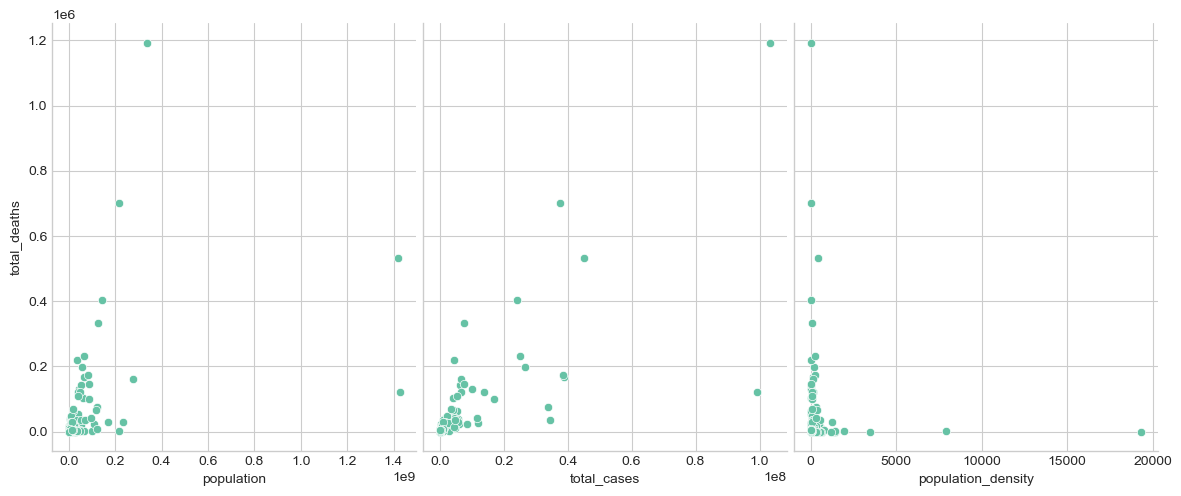

In [104]:
# visualise the features and the response using scatterplots
sns.pairplot(df_covid_cleaned, x_vars=['population', 'total_cases','population_density'], y_vars='total_deaths', height=5, aspect=0.8)

# 3. Supervised machine learning: classification

# 4. Unsupervised machine learning: clustering

# 5. Implementation of the models in a Streamlit application